<a href="https://colab.research.google.com/github/chahalinder0007/Pytorch_GAN/blob/master/pytorch_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cell-1


#its a repo to just monitor loss function link will be displayer in cell-3
!pip install lera

  Stored in directory: /root/.cache/pip/wheels/4b/04/7f/b9fe53d3ffbfa00ac6af928dfe509e0be914ffce8e86df928a
Successfully built lera


In [0]:
#Cell-2



import torch
import torchvision.datasets as data
import numpy as np
import lera

#you can choose to ignore the following cell it is merely setting up lera liabrary with the hyper parameters. 
to know more about the liabrary refer [this link](https://lera.ai)




In [3]:
#Cell-3


lera.log_hyperparams({
  'title': 'GAN ',
  'batch_size': 1,
  'epochs': 15000,
  'optimizer': 'SGD',
  'lr': 0.00001,
  
  })

lera: open https://lera.ai/m/f97b36 to view the progress


{'batch_size': 1,
 'epochs': 15000,
 'lr': 1e-05,
 'optimizer': 'SGD',
 'title': 'GAN '}

Here we will only be working with class 3 so we are merely separating the data for class 3 in **line 8**

In [4]:
#cell-4
#downloading trainining data and storing it in ./mnist
down_train_data=data.MNIST(root="./mnist/",download=True)


#entire thing just gets the index as in the required class.

idx=down_train_data.targets==3
down_train_data.targets=down_train_data.targets[idx]
down_train_data.data=down_train_data.data[idx]


X_train=down_train_data.train_data.reshape(-1,784).to(torch.float32).cuda()
Y_train=down_train_data.train_labels.reshape(-1,1).to(torch.float32)
#retreiving the test dataset
down_test_data=data.MNIST(root="./mnist/",download=True,train=False)
X_test=down_test_data.test_data.reshape(-1,784)
Y_test=down_test_data.test_labels.reshape(-1,1)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 26495464.44it/s]                            


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 431828.60it/s]
  1%|          | 16384/1648877 [00:00<00:11, 144407.18it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7135707.44it/s]                           
8192it [00:00, 174857.83it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Here we have the actual model architecture A basic representation of the same is the following image:
![alt text](https://sigmoidal.io/wp-content/uploads/2017/09/generator_and_discriminator1.png)

In [0]:
#Cell-5

#this is the generator part defined here


class net(torch.nn.Module):
    def __init__(self,D_in,D_out):
        super(net,self).__init__()
        self.gen1=torch.nn.Linear(32,256) #only thing you need to change for the dimension of noise
        self.linear2=torch.nn.Linear(256,256)
        self.gen_out=torch.nn.Linear(256,D_in)
        
    def forward(self,x):
        indata=self.gen1(x)
        indata=torch.relu(indata)

        indata2=self.linear2(indata)
        indata2=torch.relu(indata2)

        out=self.gen_out(indata)
        out=torch.tanh(out)

        return out

      
#upuntil now we created a class now we need an object to work with and the following line does the same
gen=net(784,1)

#two weights each are separately being trained in the back prop step so we need two optimizers with different model parameters name here as :: gen.parameters()
optimizer_gen=torch.optim.Adam(gen.parameters(),lr=0.0001)



class bet(torch.nn.Module):
    def __init__(self,D_in,D_out):
        super(bet,self).__init__()

        self.disc1=torch.nn.Linear(D_in,256)
        self.disc2=torch.nn.Linear(256,256)
        self.disc_out= torch.nn.Linear(256,D_out)
    def forward(self,x):
        indata=self.disc1(x)
        indata=torch.relu(indata)
        #indata=torch.tanh(indata)

        indata2=self.disc2(indata)
        indata2=torch.relu(indata2)

        out=self.disc_out(indata)
        out=torch.sigmoid(out)

        return out

disc=bet(784,1)
#for training we also need loss but we will define our custom loss for better understanding although we can use this as well
criterion = torch.nn.BCELoss()
optimizer_disc=torch.optim.Adam(disc.parameters(),lr=0.0001)

**IF you are not familiar with the modular structure for pytorch deep network I will strongly recomend** : [using this link to get a basic idea](https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0)

In [0]:
#Transfer the two modules to cuda or GPU
gen=gen.cuda()
disc=disc.cuda()

we are simple penalising the discriminator here if it calls the real image fake and fake image real. Now what does that mean.



The generator will have two outputs one for the real data and one for the fake or generated data. these output will be any value ranging from 0 to 1(as in the last layer we have an activation function sigmoid).  Now if The discriminator says that the probability of real data being real is 0.65 or 65% we will penalise it or simply the loss for the real data part will be **1-0.65 = 35**.

similarly it might say that the probability that the fake data is real is 0.25 so the loss for the fake part will become **0.25**

Now from the formula it is clear that the total loss will be loss for the fake data and loss for the real data which will comeout to be **0.35 + 0.25 = 0.6**

---



In [0]:
def loss_disc(dis_real_image,dis_fake_image):
  
  to_r=torch.mean(((1.0-dis_real_image))**2 + ((dis_fake_image))**2)
  return to_r

def loss_gen_l(dis_fake_image):
  to_r=torch.mean((dis_fake_image))**2
  
  return to_r

In [8]:
#we are merely resizing the tensor into the required shape such that it has one tensor in a batch
X_train=X_train.resize(1,X_train.size()[0],784)

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:339: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [0]:
for i in range(200):
    for j in range(X_train.size()[0]):
        #noise to the generator network
        feeder=torch.randn((X_train.size()[1],32)).cuda()
         
        fake_image=gen(feeder)
        dis_real_image=disc(X_train[j])
        #print(dis_real_image)
        dis_fake_image=disc(fake_image)
                                                       #noise                                     #noise                             #noise
        total_loss_disc=criterion(dis_real_image,((0-0.03)*torch.rand(X_train.size()[1],1)+0.03).cuda())+criterion(dis_fake_image,((0.974-1.0)*torch.rand(X_train.size()[1],1)+1).cuda())#loss_disc(dis_real_image=dis_real_image,dis_fake_image=dis_fake_image)

        lera.log("Disc_loss",total_loss_disc.item())

            
        optimizer_disc.zero_grad()
        total_loss_disc.backward()
        
        optimizer_disc.step()

        feeder=torch.randn((X_train.size()[1],32)).cuda()
        fake_image=gen(feeder)
        dis_fake_image=disc(fake_image)


        loss_gen=criterion(dis_fake_image,torch.zeros(X_train.size()[1]).cuda())#loss_gen_l(dis_fake_image)
        lera.log("Gen_loss",loss_gen.item())

        optimizer_gen.zero_grad()
        loss_gen.backward()
        optimizer_gen.step()
    

    
    print("itter::",i)

       

In [0]:
import matplotlib.pyplot as plt
import cv2

#IN the following cell we are merely doing the inference and looking at the results of our predictions. With a simplistic model and a very crude loss function as well as fewer training cycles

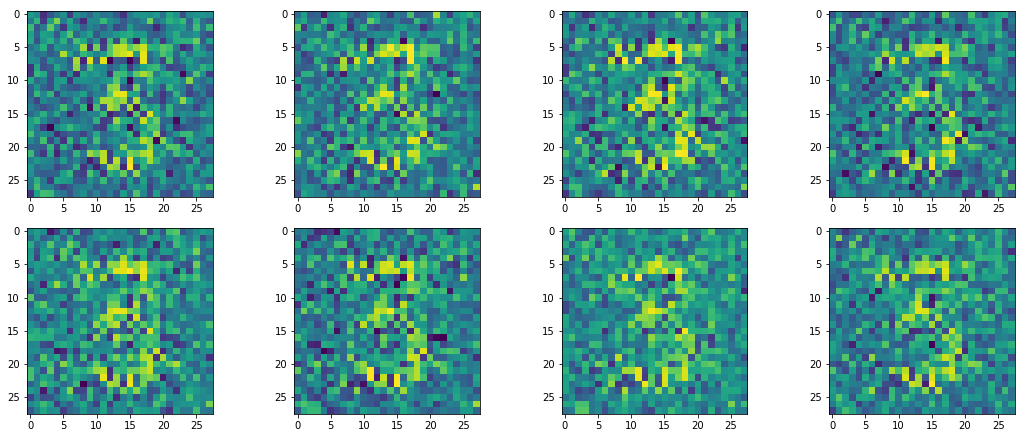

In [31]:
feeder=torch.randn((8,32)).cuda()
kk=gen(feeder).detach().cpu()
fig=plt.figure(figsize=(15, 15))

columns = 4
rows = 5
for i in range(8):
    img = kk[i].reshape(28,28)
    fig.add_subplot(rows, columns, i+1)


    plt.imshow(img) 

plt.tight_layout()

plt.show()

#These are the results from a simple very very simple GAN and you can still see that it is able to get the outline of the the handwritten digit three.

#***The following is what we feed the generator***

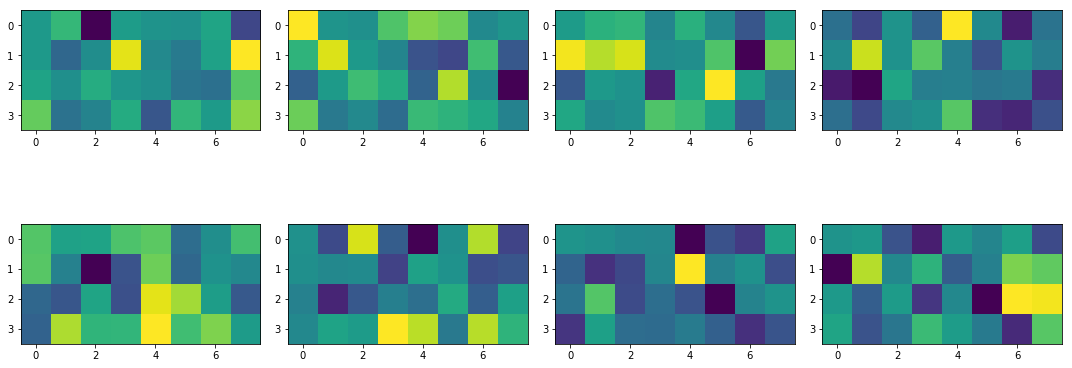

In [40]:
kk=feeder.detach().cpu()
fig=plt.figure(figsize=(15, 15))

columns = 4
rows = 5
for i in range(8):
    img = kk[i].reshape(4,8)
    fig.add_subplot(rows, columns, i+1)


    plt.imshow(img) 

plt.tight_layout()

plt.show()